# Custom Data Loader for DeepLesion Dataset

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile 
import cv2

In [2]:
# specifying the zip file name 
file_name = "./Key_slices.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip:  
    if os.path.isdir('Key_slices') == 0:
    # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall() 
        print('Done!') 
    else:
        print('File has already extracted.')

File has already extracted.


## Visualization of Key Slice

In [3]:
image_directory = './Key_slices'
info_file = './DL_info.csv'

In [4]:
class CTImage:
    def __init__(self, image_directory, info_file, study_type = 'all', patient_metadata = False):
        self.image_directory = image_directory
        self.info_file = pd.read_csv(info_file)
        if study_type != 'all':
            self.info_file = self.info_file[self.info_file.Study_index == study_type]
        self.patient_metadata = patient_metadata
        
    def get_by_user(self, user_idx):
        file_subset = self.info_file[self.info_file.Patient_index == user_idx]
        image_list = file_subset.File_name.values
        if self.patient_metadata:
            gender_list = file_subset.Patient_gender.values
            age_list = file_subset.Patient_age.values
        images = []
        for image_name in image_list:
            image_path = os.path.join(self.image_directory, image_name)
            images.append(plt.imread(image_path))
        if self.patient_metadata:
            return((images, gender_list, age_list))
        else:
            return((images,))
    
    def get_val_by_lesion(self, lesion_type = 'bone'):
        study_dict = {'bone':1, 'abdomen':2, 'mediastinum': 3,'liver':4, 'lung':5, 'kidney': 6, 'soft_tissue':7, 'pelvis':8}
        val_file = self.info_file[self.info_file.Train_Val_Test == 2]
        file_subset = images_list = val_file[val_file.Coarse_lesion_type == study_dict[lesion_type]]
        images_list = file_subset.File_name.values
        if self.patient_metadata:
            gender_list = file_subset.Patient_gender.values
            age_list = file_subset.Patient_age.values
        images = []
        for image_name in images_list:
            image_path = os.path.join(self.image_directory, image_name)
            images.append(plt.imread(image_path))
        if self.patient_metadata:
            return((images, gender_list, age_list))
        else:
            return((images,))
    
    def get_test_by_lesion(self, lesion_type = 'bone'):
        study_dict = {'bone':1, 'abdomen':2, 'mediastinum': 3,'liver':4, 'lung':5, 'kidney': 6, 'soft_tissue':7, 'pelvis':8}
        test_file = self.info_file[self.info_file.Train_Val_Test == 3]
        file_subset = test_file[test_file.Coarse_lesion_type == study_dict[lesion_type]]
        images_list = file_subset.File_name.values
        if self.patient_metadata:
            gender_list = file_subset.Patient_gender.values
            age_list = file_subset.Patient_age.values
        images = []
        for image_name in images_list:
            image_path = os.path.join(self.image_directory, image_name)
            images.append(plt.imread(image_path))
        if self.patient_metadata:
            return((images, gender_list, age_list))
        else:
            return((images,))

    def get_train(self):
        file_subset = self.info_file[self.info_file.Train_Val_Test == 1]
        images_list = file_subset.File_name.values
        images = []
        if self.patient_metadata:
            gender_list = file_subset.Patient_gender.values
            age_list = file_subset.Patient_age.values
        for image_name in images_list:
            image_path = os.path.join(self.image_directory, image_name)
            images.append(plt.imread(image_path))
        if self.patient_metadata:
            return((images, gender_list, age_list))
        else:
            return((images,))

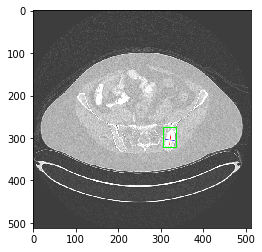

In [5]:
ct_images = CTImage(image_directory, info_file, patient_metadata = False)
plt.imshow(ct_images.get_test_by_lesion('bone')[0][1]) #Visualize the second CT image amongst bone lesion CTs
plt.show()

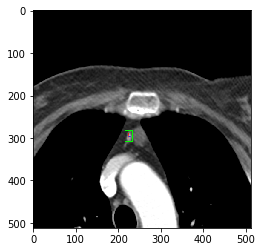

In [6]:
plt.imshow(ct_images.get_by_user(1)[0][1])

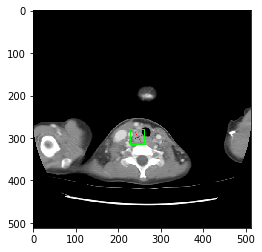

In [7]:
plt.imshow(ct_images.get_train()[0][1])

## Separate Dataset

In [8]:
csv_path = "./DL_info.csv"
Image_slices_dir = "./data/JPEGImages"
train_data = "./data/train"
valid_data = "./data/valid"
test_data = "./data/test"

In [10]:
df = pd.read_csv(csv_path)
print(df)
train_df = df[df['Train_Val_Test']==1]
validation_df = df[df['Train_Val_Test']==2]
test_df = df[df['Train_Val_Test']==3]

print(len(train_df.index))
print(len(validation_df.index))
print(len(test_df.index))

print(len(train_df.index)+len(validation_df.index)+len(test_df.index))

                  File_name  Patient_index  Study_index  Series_ID  \
0      000001_01_01_109.png              1            1          1   
1      000001_02_01_014.png              1            2          1   
2      000001_02_01_017.png              1            2          1   
3      000001_03_01_088.png              1            3          1   
4      000001_04_01_017.png              1            4          1   
...                     ...            ...          ...        ...   
32730  004458_01_01_059.png           4458            1          1   
32731  004458_01_01_049.png           4458            1          1   
32732  004458_01_01_047.png           4458            1          1   
32733  004458_01_01_102.png           4458            1          1   
32734  004459_01_01_051.png           4459            1          1   

       Key_slice_index                            Measurement_coordinates  \
0                  109  233.537, 95.0204, 234.057, 106.977, 231.169, 1...   
1    

In [17]:
file_name = os.path.join(Image_slices_dir, train_df.iloc[0]['File_name'])        
print (file_name)
image = cv2.imread(file_name)
print(image)
# plt.figure()
# plt.imshow(image)
# plt.show()


./data/JPEGImages/000003_01_01_016.png
None
